In [78]:
import pandas as pd
import seaborn as sns
import string


In [7]:
data = pd.read_csv('../../data/RAW_interactions.csv')

In [79]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

data['clean_reviews'] = data.review.apply(remove_punctuation)

data.head()

,user_id,recipe_id,date,rating,review,clean_reviews
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,Great with a salad Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",So simple so delicious Great for chilly fall...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,This worked very well and is EASY I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",Made the cheddar bacon topping adding a sprin...


In [80]:
def lowercase (text):
    lowercased = text.lower()
    return lowercased

data['clean_reviews'] = data.clean_reviews.apply(lowercase)

data.head()

,user_id,recipe_id,date,rating,review,clean_reviews
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,great with a salad cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",so simple so delicious great for chilly fall...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,this worked very well and is easy i used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,i made the mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",made the cheddar bacon topping adding a sprin...


In [81]:
def remove_numbers (text):
    words_only = ''.join([i for i in text if not i.isdigit()])
    return words_only

data['clean_reviews'] = data.clean_reviews.apply(remove_numbers)

data.head()

,user_id,recipe_id,date,rating,review,clean_reviews
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,great with a salad cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",so simple so delicious great for chilly fall...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,this worked very well and is easy i used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,i made the mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",made the cheddar bacon topping adding a sprin...


In [82]:
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = set(stopwords.words('english'))

# Create function
def remove_stopwords (text):
    tokenized = word_tokenize(text)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords

data['clean_reviews'] = data.clean_reviews.apply(remove_stopwords)

data.head()

,user_id,recipe_id,date,rating,review,clean_reviews
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,"[great, salad, cooked, top, stove, minutes, ad..."
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...","[simple, delicious, great, chilly, fall, eveni..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,"[worked, well, easy, used, quite, whole, packa..."
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,"[made, mexican, topping, took, bunko, everyone..."
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...","[made, cheddar, bacon, topping, adding, sprink..."


In [83]:
from nltk.stem import WordNetLemmatizer

def lemma(text):
    lemmatizer = WordNetLemmatizer() # Instantiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in text] # Lemmatize
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string

data['clean_reviews'] = data.clean_reviews.apply(lemma)

data.head()

,user_id,recipe_id,date,rating,review,clean_reviews
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,great salad cooked top stove minute added shak...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",simple delicious great chilly fall evening dou...
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,worked well easy used quite whole package oz w...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,made mexican topping took bunko everyone loved
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",made cheddar bacon topping adding sprinkling b...


In [86]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_bow = vectorizer.fit_transform(data.clean_reviews)
X_bow

<1132198x117613 sparse matrix of type '<class 'numpy.int64'>'
	with 26733756 stored elements in Compressed Sparse Row format>

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

cv_nb = cross_validate( MultinomialNB(), X_bow, data.rating, scoring = "accuracy")

cv_nb['test_score'].mean()

0.7236207783637204

In [63]:
data = data.drop_duplicates()
data = data.dropna()
data.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [71]:
reviews = pd.DataFrame()
reviews['review'] = data['review']
reviews['review'] = reviews['review'].apply(lambda x : x.strip().lower())
reviews['review']


0          great with a salad. cooked on top of stove for...
1          so simple, so delicious! great for chilly fall...
2          this worked very well and is easy.  i used not...
3          i made the mexican topping and took it to bunk...
4          made the cheddar bacon topping, adding a sprin...
                                 ...                        
1132362    another approach is to start making sauce with...
1132363    these were so delicious!  my husband and i tru...
1132364    wow!  sometimes i don't take the time to rate ...
1132365    very good!  i used regular port as well.  the ...
1132366    i am so glad i googled and found this here. th...
Name: review, Length: 1132198, dtype: object

In [57]:
total_nb_of_reviews = data['review']
nb_of_na_reviews = total_nb_of_reviews.isna().sum()

print(total_nb_of_reviews.count(), nb_of_na_reviews)

1132198 169


In [35]:
total_nb_of_reviews_wo_na = data['review'].dropna()
total_nb_of_reviews_wo_na.count()

1132198

<Axes: xlabel='rating', ylabel='Count'>

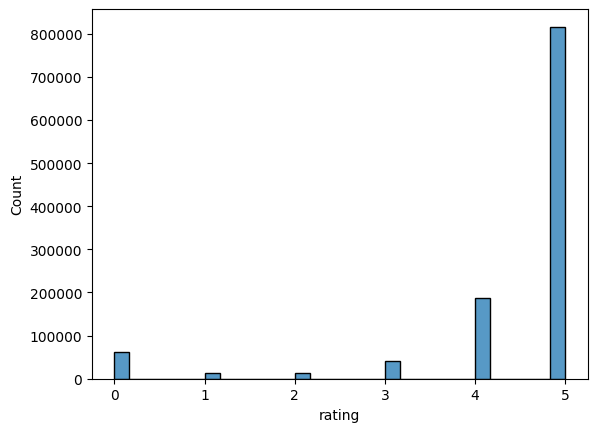

In [30]:
sns.histplot(data=data, x="rating", bins=30)